In [2]:
import math

# For visualiation
from PIL import Image, ImageDraw


In [148]:
MAX_WIDTH = 950
STEPS_PER_MM = 6400 / 80

# Use K L for left out and in
# Use E R for Right out and in


In [136]:

def translate_xy_to_ab(coord):
    x = coord[0]
    y = coord[1]
    a_len = math.sqrt(x**2 + y **2)
    b_len = math.sqrt((MAX_WIDTH-x)**2 + y**2)
    
    return [a_len, b_len]

def translate_ab_to_xy(lengths):
    a = lengths[0]
    b = lengths[1]
    
    # Cosine rule!
    #cos(left) =  (a**2 + MAX_WIDTH**2 - b**2) / (2 * a * MAX_WIDTH)
    
    try:
        left_angle = math.acos((a**2 + MAX_WIDTH**2 - b**2) / (2 * a * MAX_WIDTH))
    except Exception as e:
        # This specifically happens if the values just arn't a triangle!
        # i.e. consider maxwidth = 100, left length = 10, right = 10... one of
        # the wires must have broken!
        print("Not a triangle!")
        print((a**2 + MAX_WIDTH**2 - b**2) / (2 * a * MAX_WIDTH))
        raise e
        
    #print(left_angle) # in radians, remember.
    
    # sin(left) = opp / hyp
    # cos(right) = adj / hyp
    # hyp is 'a'
    # Lack of precision here - chop to mm. Rounding 'down'
    y = int(math.sin(left_angle) * a) 
    x = int(math.cos(left_angle) * a)
    
    return [x,y]

In [137]:
a,b  = translate_xy_to_ab((612,519))
print(a,b)

802.4369134081508 619.358539135451


In [149]:
im = Image.new(mode="RGB", size=(950,1000))
d = ImageDraw.Draw(im)

start = (500,500)
end = (100,400)

start_ab = translate_xy_to_ab(start)
end_ab = translate_xy_to_ab(end)

a_distance = end_ab[0] - start_ab[0]
b_distance = end_ab[1] - start_ab[1]

print(a_distance, b_distance)

chunky = 100
last_location = start

next_pos = start_ab

a_steps = a_distance / chunky
b_steps = b_distance / chunky

for i in range(chunky):
    # make a difference
    next_pos[0] += a_steps
    # convert back 
    
    next_location = translate_ab_to_xy(next_pos)
    d.line((last_location[0], last_location[1], next_location[0], next_location[1]), fill=(255,255,255))
    last_location = next_location
    
    # make b difference
    next_pos[1] += b_steps
    next_location = translate_ab_to_xy(next_pos)
    d.line((last_location[0], last_location[1], next_location[0], next_location[1]), fill=(255,255,255))
    
    last_location = next_location
    

-294.7962186247815 266.73350904911126


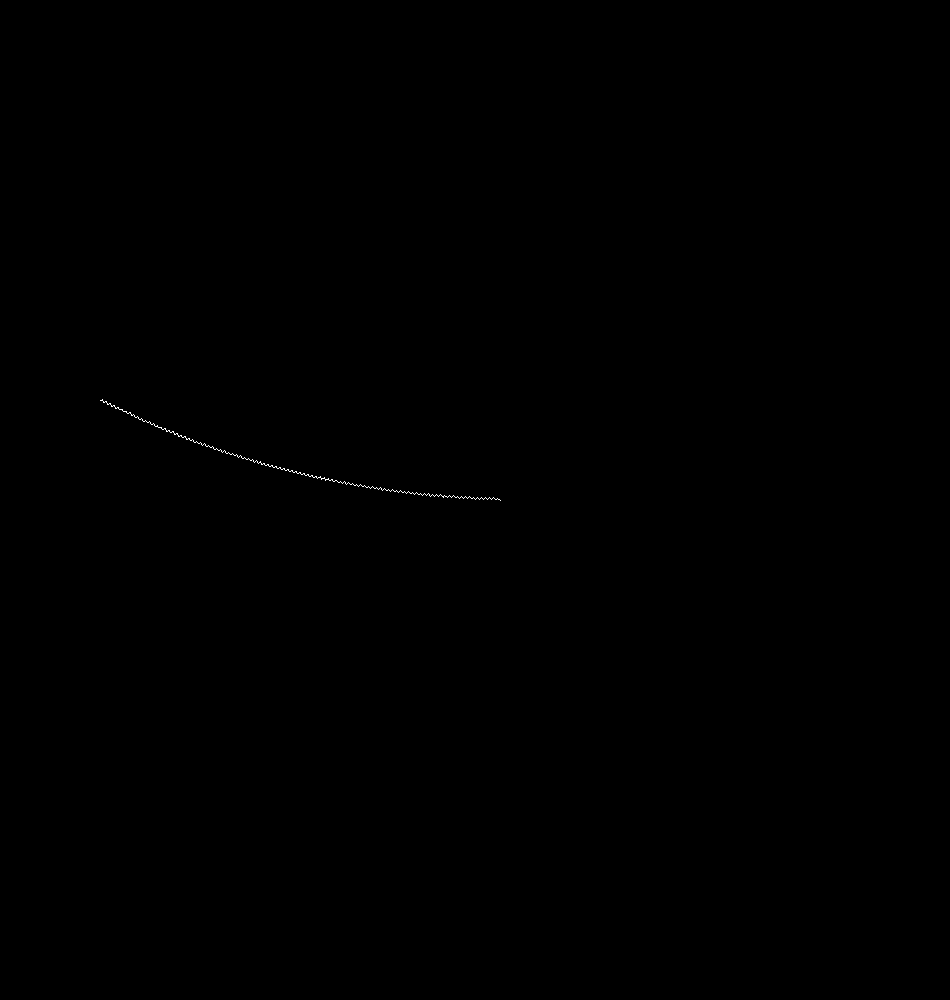

In [150]:
im

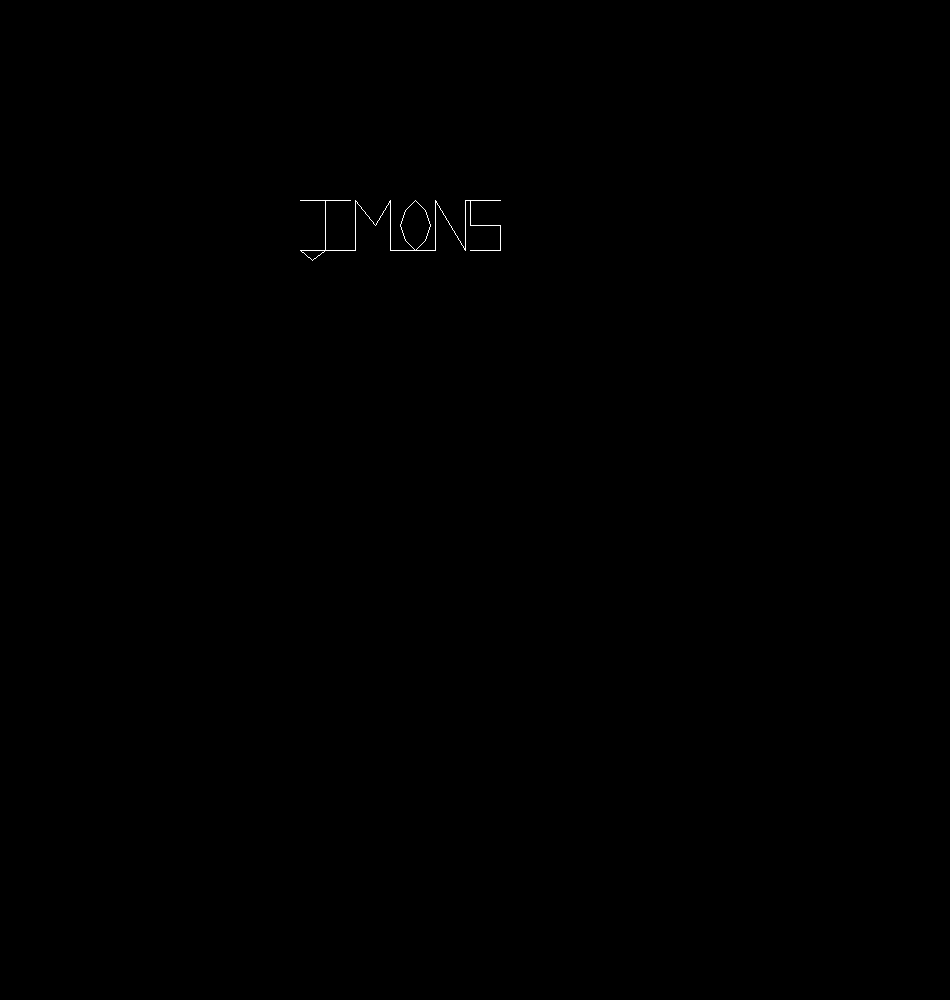

In [47]:
im = Image.new(mode="RGB", size=(950,1000))
d = ImageDraw.Draw(im)

path = [
    # J
    (300, 200),
    (350, 200),
    (325, 200),
    (325, 250),
    (312, 260),
    (300, 250),
    
    # M
    (355, 250),
    (355, 200),
    (375, 225),
    (390, 200),
    (390, 250),
    
    # O
    (415, 250),
      (405, 240),
    (400, 225),
      (405, 210),
    (415, 200),
      (425, 210),
    (430, 225),
      (425, 240),
    (415, 250),
    
    # N
    (435, 250),
    (435, 200),
    (465, 250),
    (465, 200),
    
    # S
    (500, 200),
    
    (470, 200),
    (470, 225),
    
    (500, 225),
    (500, 250),
    (470, 250),
]

last_coord = path[0]
for coord in path[1:]:
    d.line((last_coord, coord), fill=(255,255,255))
    last_coord = coord
    
im